In [76]:
%matplotlib inline
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


C:\Users\ChiefGuti\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
def ColorMap(Word,Map,M):
    Cmap=arange(M)
    for i in range(len(Word)):
        for j in range(len(Cmap)):
            if(Word[i]==Org[j]):
                Map[i]=Cmap[j]
                
def SER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))

In [3]:
def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [31]:
def visualize_classifier(model, X, y,namef, ax=None, cmap='tab20b'):
    ax = ax or plt.gca()
 


    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=500),
                         np.linspace(*ylim, num=500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    savefig(namef,dpi=300)
    show()
    close()

In [4]:
Code=loadtxt('PBRSout.txt',skiprows=5)

In [5]:
INT=[]
for i in range(int(len(Code)/4)):
    INT.append(i*4)
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))
Word=[]
for i in INT:
    Word.append(CodeWord[i]+CodeWord[i+1]+CodeWord[i+2]+CodeWord[i+3])
    
vec=array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1]
           ,[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])   
Org=[]
for i in range(len(vec)):
    Org.append(''.join(str(x) for x in vec[i]))

In [6]:
Map=zeros(len(Word))
ColorMap(Word,Map,16)
Map=Map[0:1024]

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'max_depth': [5, 20, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.3min finished


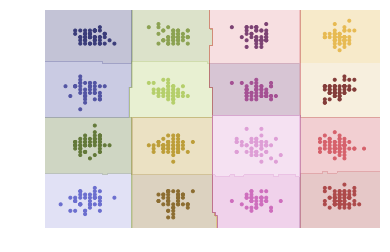

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.5min finished


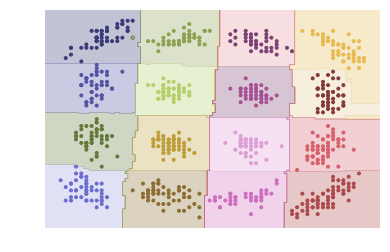

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.4min finished


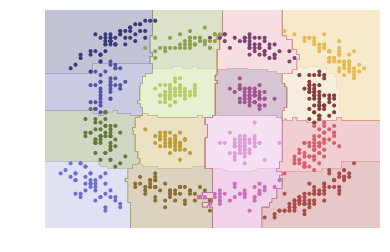

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.5min finished


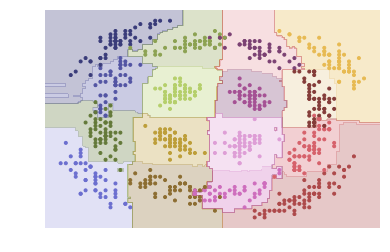

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.9min finished


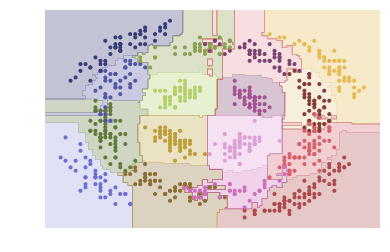

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.5min finished


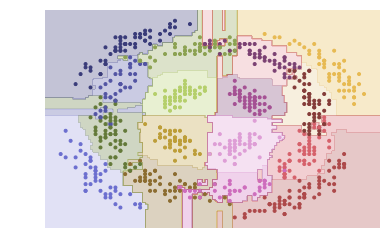

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.8min finished


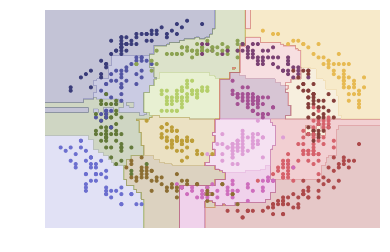

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.0min finished


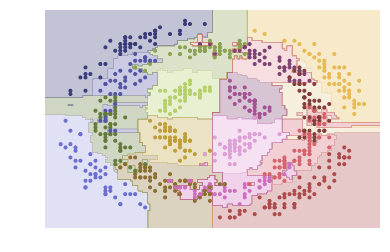

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.6min finished


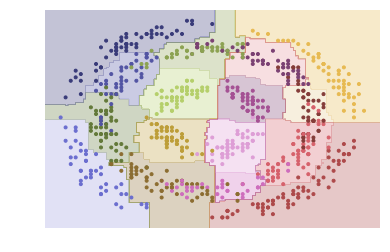

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.7min finished


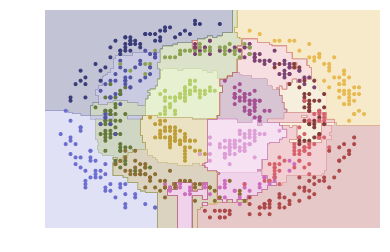

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.9min finished


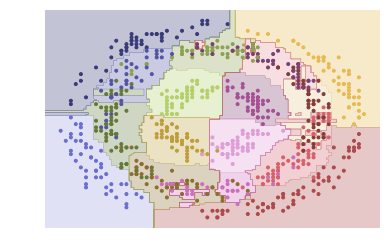

In [70]:
BERt=[]
for i in arange(0,1100,100):
        data=loadtxt('Output6R22OSNRLo%i.txt'%i,delimiter=';')
        data=data[1::2]
        DataSet=zeros((len(data[:,0]),2))
        NormData(DataSet,data)
        X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)
        gridF = GridSearchCV(RandomForestClassifier(), random_grid, cv = 3, verbose = 2, n_jobs = -1)
        bestF = gridF.fit(X_train, y_train)
        best=gridF.best_params_
        forest=RandomForestClassifier(max_depth=best['max_depth'],max_features=best['max_features'],min_samples_leaf=best['min_samples_leaf'],min_samples_split=best['min_samples_split'],n_estimators=best['n_estimators'])
        forest.fit(X_train,y_train)
        y_prediction=forest.predict(X_test)
        BERt.append(BER(y_test,y_prediction))
        visualize_classifier(forest,X_train,y_train,'LODesicionReg%i.png'%i)

In [71]:
BERt

[0.0,
 0.00975609756097561,
 0.03902439024390244,
 0.05853658536585366,
 0.08780487804878048,
 0.1024390243902439,
 0.13170731707317074,
 0.14634146341463414,
 0.1951219512195122,
 0.2048780487804878,
 0.1902439024390244]

In [59]:
berreal=[]
with open('BER.txt') as f:   
    for line in f:
        if 'SER_MC:' in line:
            berreal.append(line)
BERdata=[]            
for i in berreal:
    BERdata.append(float(i.split()[1]))


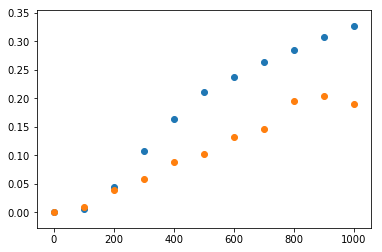

In [74]:
LO=arange(0,1100,100)
scatter(LO,BERdata[0::2])
scatter(LO,BERt)

In [73]:
points=[]
for i in range(len(data)):
    points.append([data[:,0][i]/max(data[:,0]),data[:,1][i]/max(data[:,0])])

In [77]:
kmeans = KMeans(n_clusters=16, random_state=0).fit(points)

In [78]:
mapK=kmeans.labels_
center=kmeans.cluster_centers_

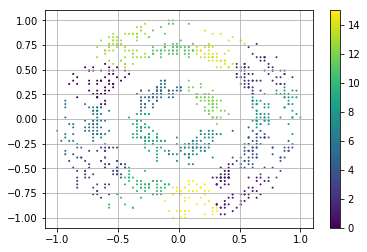

In [79]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),c=mapK,s=1)
grid(True)
colorbar()

In [90]:
SER(mapK,Map)

0.8828125

In [84]:
mapK

array([ 6,  6,  4, ..., 13, 13,  3])

In [86]:
Map

array([  3.,   1.,  11., ...,   0.,   0.,   3.])